In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score


In [27]:
data = pd.read_csv('/content/Real estate.csv')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [28]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [29]:
print(X)

[[1.0000000e+00 2.0129170e+03 3.2000000e+01 ... 1.0000000e+01
  2.4982980e+01 1.2154024e+02]
 [2.0000000e+00 2.0129170e+03 1.9500000e+01 ... 9.0000000e+00
  2.4980340e+01 1.2153951e+02]
 [3.0000000e+00 2.0135830e+03 1.3300000e+01 ... 5.0000000e+00
  2.4987460e+01 1.2154391e+02]
 ...
 [4.1200000e+02 2.0132500e+03 1.8800000e+01 ... 7.0000000e+00
  2.4979230e+01 1.2153986e+02]
 [4.1300000e+02 2.0130000e+03 8.1000000e+00 ... 5.0000000e+00
  2.4966740e+01 1.2154067e+02]
 [4.1400000e+02 2.0135000e+03 6.5000000e+00 ... 9.0000000e+00
  2.4974330e+01 1.2154310e+02]]


In [30]:
print(y)

[ 37.9  42.2  47.3  54.8  43.1  32.1  40.3  46.7  18.8  22.1  41.4  58.1
  39.3  23.8  34.3  50.5  70.1  37.4  42.3  47.7  29.3  51.6  24.6  47.9
  38.8  27.   56.2  33.6  47.   57.1  22.1  25.   34.2  49.3  55.1  27.3
  22.9  25.3  47.7  46.2  15.9  18.2  34.7  34.1  53.9  38.3  42.   61.5
  13.4  13.2  44.2  20.7  27.   38.9  51.7  13.7  41.9  53.5  22.6  42.4
  21.3  63.2  27.7  55.   25.3  44.3  50.7  56.8  36.2  42.   59.   40.8
  36.3  20.   54.4  29.5  36.8  25.6  29.8  26.5  40.3  36.8  48.1  17.7
  43.7  50.8  27.   18.3  48.   25.3  45.4  43.2  21.8  16.1  41.   51.8
  59.5  34.6  51.   62.2  38.2  32.9  54.4  45.7  30.5  71.   47.1  26.6
  34.1  28.4  51.6  39.4  23.1   7.6  53.3  46.4  12.2  13.   30.6  59.6
  31.3  48.   32.5  45.5  57.4  48.6  62.9  55.   60.7  41.   37.5  30.7
  37.5  39.5  42.2  20.8  46.8  47.4  43.5  42.5  51.4  28.9  37.5  40.1
  28.4  45.5  52.2  43.2  45.1  39.7  48.5  44.7  28.9  40.9  20.7  15.6
  18.3  35.6  39.4  37.4  57.8  39.6  11.6  55.5  5

In [31]:
from sklearn.preprocessing import PolynomialFeatures


In [32]:
poly = PolynomialFeatures(degree=2,include_bias=False)
X_poly = poly.fit_transform(X)

In [33]:
X_poly.shape

(414, 35)

In [34]:
X.shape

(414, 7)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_poly,y,test_size=0.2,random_state=101)

In [36]:
poly_model = LinearRegression()

In [37]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [38]:
y_pred = poly_model.predict(X_test)

In [39]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)

,Y_Test,Y_Pred,Residuals
0,19.2,16.038490,3.161510
1,11.2,7.745285,3.454715
2,24.7,19.434198,5.265802
3,46.1,46.792965,-0.692965
4,31.3,26.513477,4.786523


In [40]:
MAE_Poly = mean_absolute_error(y_test,y_pred)
MSE_Poly = mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

,metrics
MAE,4.278984
MSE,29.378298
RMSE,5.420175


COMPARING WITH A SIMPLE LINEAR MODEL


In [41]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = mean_absolute_error(ys_test,ys_pred)
MSE_simple = mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [42]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])

,Poly Metrics,Simple Metrics
MAE,4.278984,5.373025
MSE,29.378298,45.880307
RMSE,5.420175,6.773500


In [43]:
print(MAE_simple)
print(MSE_Poly)
print(RMSE_Poly)

5.3730245325716925
29.37829840089954
5.420175126405008


In [44]:
# Train List of RMSE per degree
train_RMSE_list=[]
#Test List of RMSE per degree
test_RMSE_list=[]

for d in range(1,10):

    #Preprocessing
    #create poly data set for degree (d)
    polynomial_converter= PolynomialFeatures(degree=d, include_bias=False)
    poly_features= polynomial_converter.fit(X)
    poly_features= polynomial_converter.transform(X)

    #Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

    #Train the Model
    polymodel=LinearRegression()
    polymodel.fit(X_train, y_train)

    #Predicting on both Train & Test Data
    y_train_pred=polymodel.predict(X_train)
    y_test_pred=polymodel.predict(X_test)

    #Evaluating the Model

    #RMSE of Train set
    train_RMSE=np.sqrt(mean_squared_error(y_train, y_train_pred))

    #RMSE of Test Set
    test_RMSE=np.sqrt(mean_squared_error(y_test, y_test_pred))

    #Append the RMSE to the Train and Test List

    train_RMSE_list.append(train_RMSE)
    test_RMSE_list.append(test_RMSE)

In [45]:
pd.DataFrame({'Train RMSE List':train_RMSE_list})

,Train RMSE List
0,9.537107
1,8.051956
2,7.256683
3,6.164940
4,5.278492
5,5.352144
6,5.478648
7,5.863090
8,6.359515


In [46]:
pd.DataFrame({'Ttest RMSE List':test_RMSE_list})

,Ttest RMSE List
0,6.773500
1,5.618565
2,9.259449
3,70.291560
4,128.746977
5,515.811899
6,13183.112438
7,14129.941993
8,15105.823077


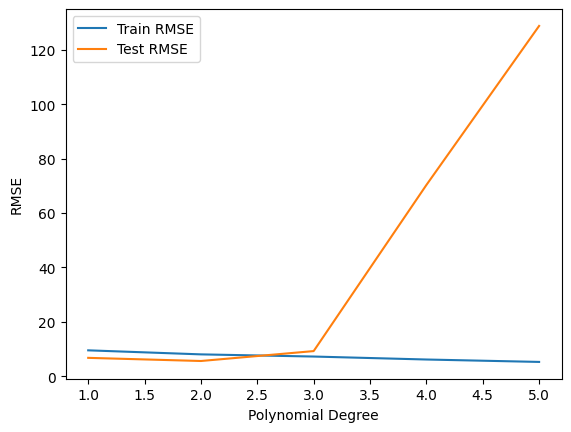

In [47]:
plt.plot(range(1,6), train_RMSE_list[:5], label='Train RMSE')
plt.plot(range(1,6), test_RMSE_list[:5], label='Test RMSE')

plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()